# PART 2 - Gini analysis

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lorenz(ax, data):
    """ Plot a Lorenz Curve """

    # Order the data
    l_data = np.sort(data)

    # Y axe: Cumsum, from 0 to 1
    l_y = np.cumsum(l_data) / l_data.sum()
    l_y = np.append([0], l_y)

    # X axe: Linspace, from 0 to 1
    l_x = np.linspace(0, 1, len(l_y))

    ax.fill_between(l_x, l_y, zorder=2)
    ax.fill_between(l_x, l_x, l_y, zorder=2, color='#3977af', alpha=0.5)

    median = l_y[int(round(len(l_y)) / 2)]
    ax.plot([0.5, 0.5], [0, median], color='#fcc500', linestyle=':', linewidth=2, label="Median")
    ax.plot([0, 0.5], [median, median], color='#fcc500', linestyle=':', linewidth=2)

    medial = len(l_y[l_y <= 0.5]) / len(l_y)
    ax.plot([0, medial], [0.5, 0.5], color='#f70028', linestyle=':', linewidth=2, label="Medial")
    ax.plot([medial, medial], [0, 0.5], color='#f70028', linestyle=':', linewidth=2)

    ax.plot([0, 1], [0, 1], color='#999999', linestyle='-', linewidth=1)
    ax.plot([0, 1], [0, 0], color='#999999', linestyle='-', linewidth=1)
    ax.plot([1, 1], [0, 1], color='#999999', linestyle='-', linewidth=1)

    # Set legend
    ax.legend()

    # Set labels
    ax.set_xlabel('Part cumulée de la population')
    ax.set_ylabel('Part cumulée des revenus')

    # Set title
    ax.set_title(the_country)

pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
# Import data from PART 1
with open("data/main_df.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    main_df = my_unpickler.load()
    
with open("data/overview.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    overview = my_unpickler.load()

display(main_df.head())
display(overview.head())

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678,0.32141
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678,0.32141
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678,0.32141


,fao_pop,data_pop,ratio_pop,fao_countries,data_countries,ratio_countries
year,,,,,,
2004,7814030414,17827825,0.0023,230,1,0.0043
2005,7902641549,0,0.0000,230,0,0.0000
2006,7992046205,287547999,0.0360,231,5,0.0216
2007,8082212236,2750266740,0.3403,231,15,0.0649
2008,8173074314,2316203248,0.2834,231,74,0.3203


## Create new features
income_total => The total income (in $PPP) for the country  
income_ratio => income / income_total. It will be useful to plot and compare classes distribution between different countries

In [3]:
income_total = (
    main_df[['country', 'year', 'income']]
        .groupby(['country', 'year'])
        .sum()
        .reset_index()
)
income_total.rename(columns={'income':'income_total'}, inplace=True)

main_df = main_df.merge(income_total, how='left', on=['country', 'year'])
main_df['income_ratio'] = main_df.income / main_df.income_total

main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini,income_total,income_ratio
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678,0.32141,299482.9902,0.002434
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678,0.32141,299482.9902,0.003061
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678,0.32141,299482.9902,0.003376
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678,0.32141,299482.9902,0.003629
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678,0.32141,299482.9902,0.003782


# Classes distribution

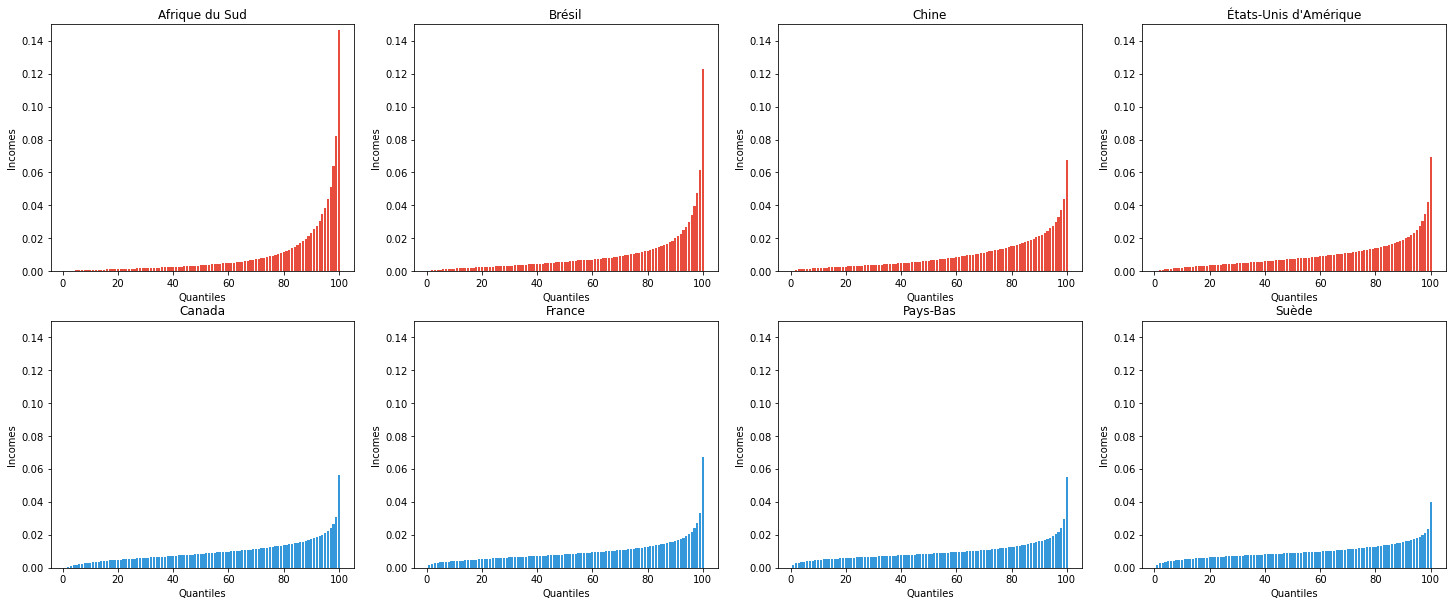

In [4]:
countries = ['ZAF','BRA', 'CHN', 'USA', 'CAN', 'FRA', 'NLD', 'SWE']
colors = ['#e74c3c','#e74c3c','#e74c3c','#e74c3c','#3498db','#3498db','#3498db','#3498db']

fig = plt.figure(figsize=(25,10))
                 
for i,x in enumerate(countries):
    data = main_df[main_df.country == x]
    the_country = data['country_full'].iloc[0]
    ax = plt.subplot(2,4,i+1)
    #MyPlot.bg(ax)
    #MyPlot.border(ax)
    plt.bar(data['quantile'], data['income_ratio'], label=the_country, zorder=2, color=colors[i])
    plt.title(the_country)
    plt.xlabel('Quantiles')
    plt.ylabel('Incomes')
    plt.ylim(0,0.15)

plt.show()

## Lorenz Curve

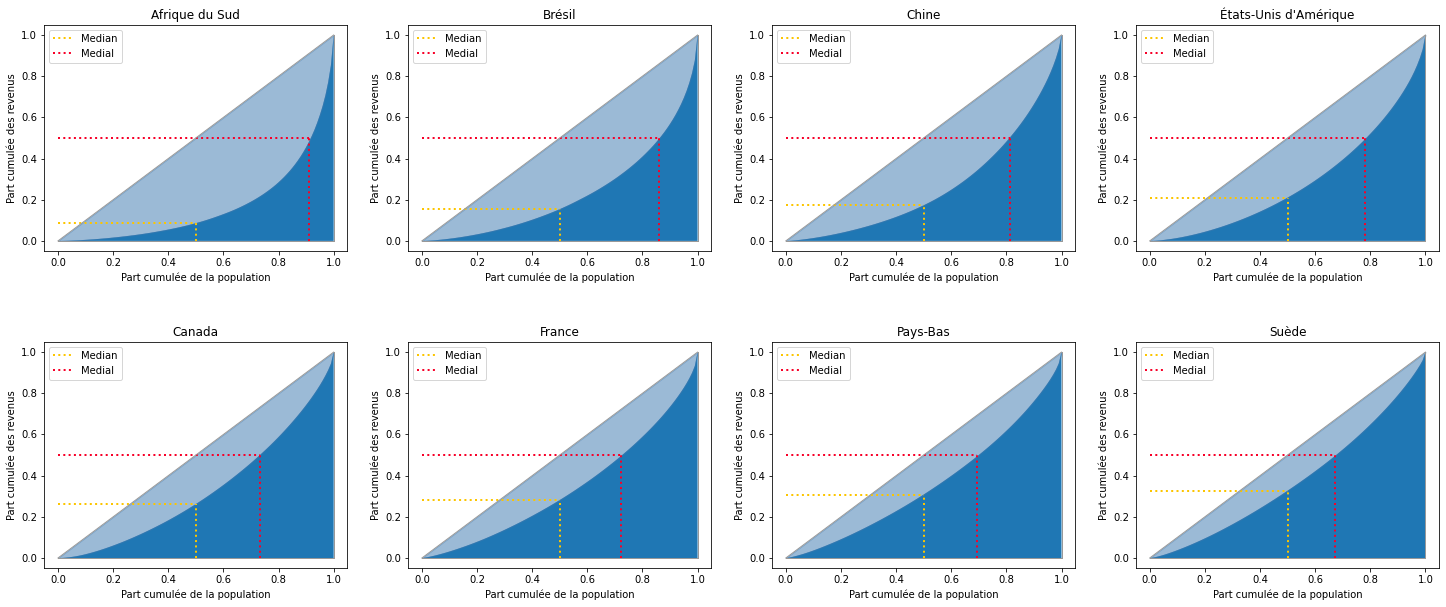

In [5]:
fig = plt.figure(figsize=(25,10))

for i,x in enumerate(countries):
    ax = plt.subplot(2,4,i+1)
    
    data = main_df[main_df.country == x]
    the_country = data['country_full'].iloc[0]
    
    lorenz(ax, data['income'])

plt.gcf().subplots_adjust(hspace=0.4)
plt.show()

## Gini evolution by country

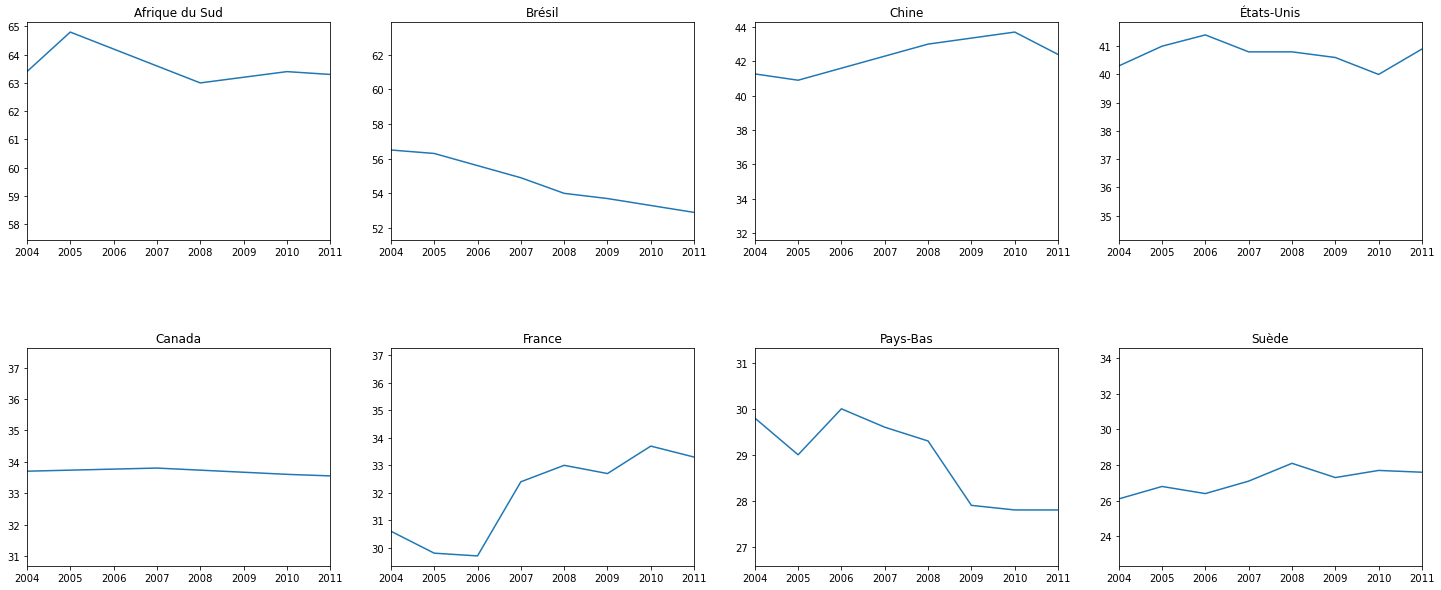

In [6]:
df = pd.read_csv("Sources/GINI_data.csv")
fig = plt.figure(figsize=(25,10))

for i,x in enumerate(countries):
    
    country = df[df['Country Code'] == x]['Country Name'].iloc[0]
    
    tempdf = (
        df[df['Country Code'] == x]
            .dropna(axis=1)
            .drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
    )
    
    years = pd.Series(tempdf.columns.to_list()).astype(int)
    ginis = pd.Series(tempdf.iloc[0].to_list())
    
    ax = plt.subplot(2,4,i+1)
    plt.plot(years, ginis)
    plt.xlim([2004,2011])
    ax.set_title(country)

plt.gcf().subplots_adjust(hspace=0.5)
plt.show()

## Gini Index : Best and Worst countries + mean

In [7]:
print("Best Gini countries")
display(main_df.sort_values(by='gini', ascending=True)[['country_full', 'country', 'gini']].drop_duplicates().head())

print("Worst Gini countries")
display(main_df.sort_values(by='gini', ascending=False)[['country_full', 'country', 'gini']].drop_duplicates().head())

# Mean
print(f"Gini (mean): {main_df[['country', 'gini']].drop_duplicates().mean().iloc[0]:.3f}")

Best Gini countries


,country_full,country,gini
9450,Slovénie,SVN,0.248249
9394,Slovaquie,SVK,0.264573
9571,Suède,SWE,0.272166
10572,Ukraine,UKR,0.272415
2435,Danemark,DNK,0.277100


Worst Gini countries


,country_full,country,gini
11100,Afrique du Sud,ZAF,0.682949
3901,Honduras,HND,0.615512
2031,Colombie,COL,0.583437
3801,Guatemala,GTM,0.582468
1438,République centrafricaine,CAF,0.575972


Gini (mean): 0.397


### What about France ?

In [8]:
tempdf = main_df[['country', 'gini']].drop_duplicates().sort_values(by='gini').reset_index(drop=True)
nb_countries = len(tempdf)

ind = tempdf.query("country == 'FRA'")['gini'].iloc[0]
pos_fra = tempdf.query("country == 'FRA'").index[0] + 1

print(f"Value: {ind}")
print(f"Position of France: {pos_fra}")
print(f"Total countries: {nb_countries}")

Value: 0.34563984035678896
Position of France: 38
Total countries: 113


## Complete ranking of Gini Index

In [9]:
rankdf = main_df[['country', 'country_full', 'gini']].drop_duplicates().sort_values(by='gini', ascending=True).reset_index(drop=True)
rankdf.index += 1
display(rankdf)

,country,country_full,gini
1,SVN,Slovénie,0.248249
2,SVK,Slovaquie,0.264573
3,SWE,Suède,0.272166
4,UKR,Ukraine,0.272415
5,DNK,Danemark,0.277100
6,NOR,Norvège,0.280147
7,ARM,Arménie,0.280305
8,BLR,Bélarus,0.283292
9,KAZ,Kazakhstan,0.284499
10,HUN,Hongrie,0.291237


# Average income by country

In [10]:
income_df = main_df[['country','income']].groupby('country').mean().reset_index()
income_df.rename(columns={'income':'income_avg'}, inplace=True)

main_df = main_df.merge(income_df, how='left', on='country').copy()

main_df.head()

,country,year,quantile,nb_quantiles,income,gdpppp,country_full,population,gini,income_total,income_ratio,income_avg
0,ALB,2008,1,100,728.89795,7297.0,Albanie,3002678,0.32141,299482.9902,0.002434,2994.829902
1,ALB,2008,2,100,916.66235,7297.0,Albanie,3002678,0.32141,299482.9902,0.003061,2994.829902
2,ALB,2008,3,100,1010.91600,7297.0,Albanie,3002678,0.32141,299482.9902,0.003376,2994.829902
3,ALB,2008,4,100,1086.90780,7297.0,Albanie,3002678,0.32141,299482.9902,0.003629,2994.829902
4,ALB,2008,5,100,1132.69970,7297.0,Albanie,3002678,0.32141,299482.9902,0.003782,2994.829902


# Save data

In [11]:
with open("data/main_df.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(main_df)
    
with open("data/overview.pkl", "wb") as f:
    my_pickle = pickle.Pickler(f)
    my_pickle.dump(overview)